In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pythainlp.tag import pos_tag
import random

In [48]:
a = ['ฉัน','กิน','ข้าว', 'ปลา', 'อาหาร']
pos_tag(a,engine='unigram')

[('ฉัน', 'PPRS'),
 ('กิน', 'VACT'),
 ('ข้าว', 'NCMN'),
 ('ปลา', 'NCMN'),
 ('อาหาร', 'NCMN')]

In [31]:
cnt_all = 0
cnt_ne_sample = 0
dictionary = {}
with open('../fasttext.th.vec', 'r', encoding='utf8') as f:
    for i in f:
        tmp = i.split()
        if len(tmp) == 301:
            dictionary[tmp[0]] = np.array([float(w) for w in tmp[1:]])

oov_list = []
length = []
cnt_ne = []
indataset = []
with open('../clean169_no_stopwords.txt', 'r', encoding='utf8') as f1:
    with open('../label169_no_stopwords.txt', 'r', encoding='utf8') as f2:
        with open('../clean169_no_stopwords_NE.txt', 'w', encoding='utf8') as o1:
            with open('../lable169_no_stopwords_NE.txt', 'w', encoding='utf8') as o2:
                with open('../clean169_no_stopwords_not_NE.txt', 'w', encoding='utf8') as o3:
                    with open('../lable169_no_stopwords_not_NE.txt', 'w', encoding='utf8') as o4:
                        for ind, line in enumerate(f1):
                            if ind%4000==0:
                                print(ind)
                            line1 = line.strip()
                            line2 = f2.readline().strip()
                            cnt_all += 1
                            cnt_oov = 0
                            if '1' in line2.split('|'):
                                tmp_cnt_ne = 0
                                for i in line2.split('|'):
                                    if i.strip() == '1':
                                        tmp_cnt_ne +=1
                                cnt_ne.append(tmp_cnt_ne)
                                cnt_ne_sample += 1
                                o1.write(line1 + '\n')
                                o2.write(line2 + '\n')
                                indataset.append(0)
                            else:
                                o3.write(line1 + '\n')
                                o4.write(line2 + '\n')
                                indataset.append(1)
                            for word in line1.split('|'):
                                if word not in dictionary:
                                    cnt_oov += 1
                            oov_list.append(cnt_oov)
                            length.append(len(line1.split('|')))

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000
52000
56000
60000
64000
68000
72000
76000
80000
84000
88000
92000
96000
100000
104000
108000
112000
116000
120000
124000
128000
132000
136000
140000
144000
148000
152000
156000
160000
164000
168000
172000
176000
180000
184000
188000
192000
196000
200000
204000
208000
212000
216000
220000
224000
228000
232000
236000
240000
244000
248000
252000
256000
260000
264000
268000
272000
276000
280000
284000


In [39]:
print(cnt_ne_sample)
print(cnt_all)

130714
285268


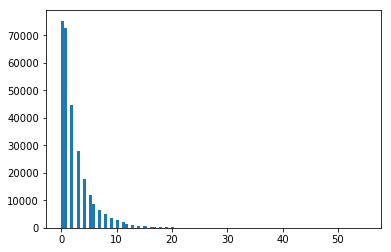

In [32]:
plt.hist(oov_list,100)
plt.show()
#length = []
#indataset = []

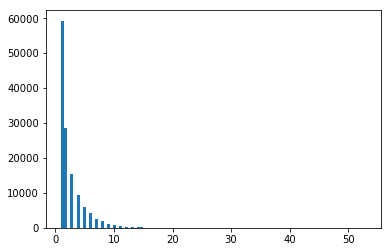

In [33]:
plt.hist(cnt_ne,100)
plt.show()

In [34]:
length_ne = [length[i] for i in range(len(length)) if indataset[i] == 0]

In [35]:
len(length_ne)

130714

In [36]:
len(cnt_ne)

130714

In [37]:
percent_ne = [length_ne[i]/cnt_ne[i] for i in range(len(cnt_ne))]

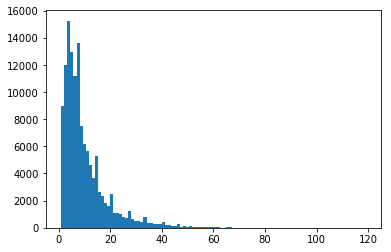

In [38]:
plt.hist(percent_ne,100)
plt.show()

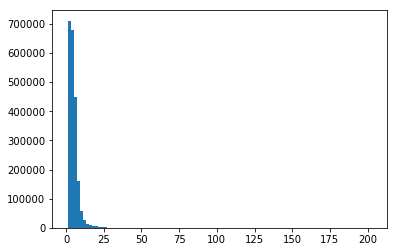

------------------------


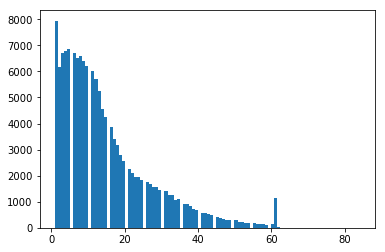

In [6]:
char_len = []
word_seq_len = []
with open('../clean84withpos.txt', 'r', encoding='utf8') as f:
    for i in f:
        tmp_word = i.strip().split('|')
        word_seq_len.append(len(tmp_word))
        for j in tmp_word:
            char_len.append(len(j))
plt.hist(char_len, 100)
plt.show()
print('------------------------')
plt.hist(word_seq_len, 100)
plt.show()

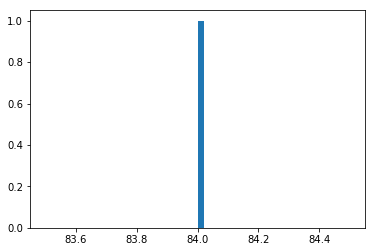

1


In [21]:
x = [i for i in word_seq_len if i == 84]
plt.hist(x,50)
plt.show()
print(len(x))

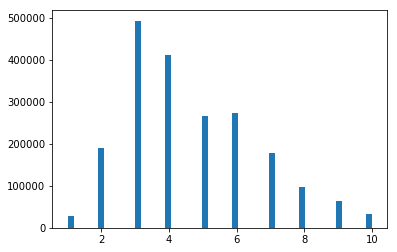

0.951347640272336


In [20]:
x = [i for i in char_len if i <=10]
plt.hist(x,50)
plt.show()
print(len(x)/len(char_len))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
length_ne
num_ne_samples: 65446


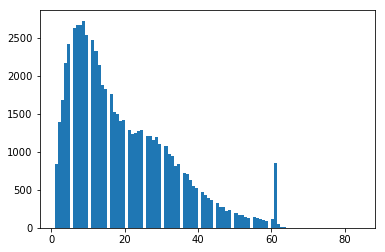

----------------------------
OOV_ne


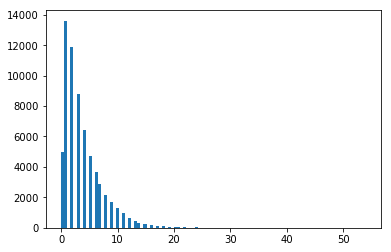

****************************
length_non_ne
num_ne_samples: 78313


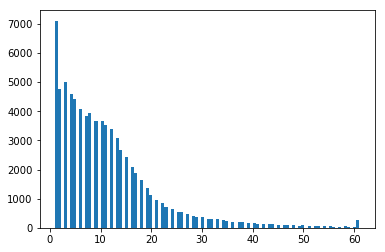

----------------------------
OOV_non_ne


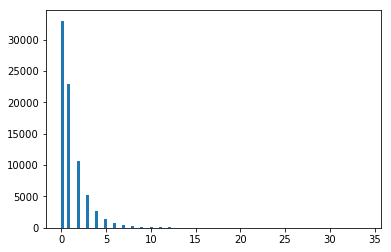

In [6]:
cnt_all = 0
cnt_ne_sample = 0
dictionary = {}
with open('../fasttext.th.vec', 'r', encoding='utf8') as f:
    for i in f:
        tmp = i.split()
        if len(tmp) == 301:
            dictionary[tmp[0]] = np.array([float(w) for w in tmp[1:]])

oov_ne = []
oov_non_ne = []
length_ne = []
length_non_ne = []

with open('../label84withpos.txt', 'r', encoding='utf8') as f1:
    with open('../clean84withpos.txt', 'r', encoding='utf8') as f2:
        with open('../pos_tag84withpos.txt', 'r', encoding='utf8') as f3:
            with open('../label84withpos_ne.txt', 'w', encoding='utf8') as o1:
                with open('../clean84withpos_ne.txt', 'w', encoding='utf8') as o2:
                    with open('../pos_tag84withpos_ne.txt', 'w', encoding='utf8') as o3:
                        with open('../label84withpos_non_ne.txt', 'w', encoding='utf8') as o4:
                            with open('../clean84withpos_non_ne.txt', 'w', encoding='utf8') as o5:
                                with open('../pos_tag84withpos_non_ne.txt', 'w', encoding='utf8') as o6:
                                    for ind, line in enumerate(f1):
                                        if ind%1000 == 0:
                                            print(ind)
                                        label = [int(i) for i in line.strip().split('|')]
                                        data = f2.readline().strip()
                                        words = data.split('|')
                                        pos = f3.readline().strip()
                                        tmp_oov_cnt = 0
                                        for word in words:
                                            if word not in dictionary:
                                                tmp_oov_cnt += 1
                                        if 1 not in label:
                                            o4.write(line.strip()+'\n')
                                            o5.write(data+'\n')
                                            o6.write(pos+'\n')
                                            cnt_all += 1
                                            oov_non_ne.append(tmp_oov_cnt)
                                            length_non_ne.append(len(label))
                                        else:
                                            o1.write(line.strip()+'\n')
                                            o2.write(data+'\n')
                                            o3.write(pos+'\n')
                                            cnt_ne_sample += 1
                                            cnt_all += 1
                                            oov_ne.append(tmp_oov_cnt)
                                            length_ne.append(len(label))
print('length_ne')
print(f'num_ne_samples: {len(length_ne)}')
plt.hist(length_ne, 100)
plt.show()
print('----------------------------')
print('OOV_ne')
plt.hist(oov_ne, 100)
plt.show()
print('****************************')
print('length_non_ne')
print(f'num_ne_samples: {len(length_non_ne)}')
plt.hist(length_non_ne, 100)
plt.show()
print('----------------------------')
print('OOV_non_ne')
plt.hist(oov_non_ne, 100)
plt.show()

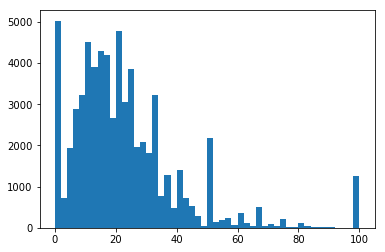

In [7]:
oov_ratio = [oov_ne[i]*100/length_ne[i] for i in range(len(oov_ne))]
plt.hist(oov_ratio, 50)
plt.show()

In [11]:
len([i for i in oov_ratio if i>=20])/len(oov_ratio)

0.490007028695413

In [13]:
num_data = []
for i in range(2):
    with open('../label84withpos_ne.txt', 'r', encoding='utf8') as f1:
        with open('../clean84withpos_ne.txt', 'r', encoding='utf8') as f2:
            with open('../pos_tag84withpos_ne.txt', 'r', encoding='utf8') as f3:
                with open('../label84withpos_ne_tr'+ str(i) + '.txt', 'w', encoding='utf8') as o1:
                    with open('../clean84withpos_ne_tr' + str(i) + '.txt', 'w', encoding='utf8') as o2:
                        with open('../pos_tag84withpos_ne_tr'+ str(i) +'.txt', 'w', encoding='utf8') as o3:
                            with open('../label84withpos_ne_te'+ str(i) + '.txt', 'w', encoding='utf8') as o4:
                                with open('../clean84withpos_ne_te' + str(i) + '.txt', 'w', encoding='utf8') as o5:
                                    with open('../pos_tag84withpos_ne_te'+ str(i) +'.txt', 'w', encoding='utf8') as o6:
                                        tmp_cnt_tr = 0
                                        tmp_cnt_te = 0
                                        for line in f1:
                                            label = line.strip()
                                            data = f2.readline().strip()
                                            pos = f3.readline().strip()
                                            if random.uniform(0,1) > 0.8:
                                                o4.write(label + '\n')
                                                o5.write(data + '\n')
                                                o6.write(pos + '\n')
                                                tmp_cnt_te += 1
                                            else:
                                                o1.write(label + '\n')
                                                o2.write(data + '\n')
                                                o3.write(pos + '\n')
                                                tmp_cnt_tr += 1
                                        num_data.append((tmp_cnt_tr,tmp_cnt_te))
print(num_data)

[(52247, 13199), (52370, 13076)]
